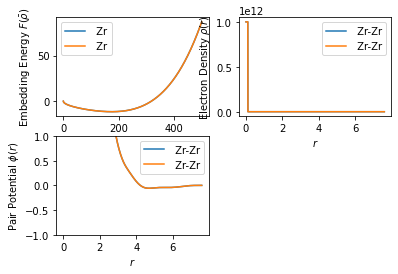

In [121]:
#sinusoid
from ase.build import bulk
from ase import Atoms
from ase.atom import Atom
from ase.calculators.emt import EMT
from ase.phonons import Phonons
from ase.dft.kpoints import *
import matplotlib.pyplot as plt
import numpy as np
from ase.calculators.eam import EAM
from ase.md import verlet
from ase.md.verlet import VelocityVerlet
from ase import units

zr1 = EAM(potential='Zr_3.eam.fs')
zr1.write_potential('Zr_3.eam.fs')
zr1.plot()

zr2 = EAM(potential='Zr_3.eam.fs')
zr2.write_potential('Zr_3.eam.fs')
zr2.plot()

In [122]:


def MC_2part(d):
    a = Atoms([Atom('Zr', (0, 0, -d/2)), Atom('Zr', (0, 0, d/2))],calculator = zr1)

    dyn = VelocityVerlet(a, timestep=1*ase.units.fs)

    forces = []
    Etotal = []

    def forceplot(a):
        F = a.get_forces() 
        forces.append(F[0][2])
        etot = a.get_potential_energy() + a.get_kinetic_energy()
        Etotal.append(etot)


    for i in range(300):
        dyn.run(2)
        forceplot(a)
    
    return forces, Etotal

In [123]:
f1,e1 = MC_2part(2)
f2,e2 = MC_2part(3)
f3,e3 = MC_2part(5)

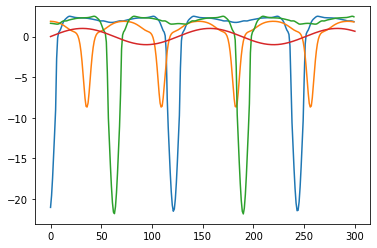

In [138]:
plt.plot(f1)
plt.plot(f2)
plt.plot(f3)
x = np.linspace(0,300,30000)
ax = np.array(x)
f4 = np.sin(ax/20)
plt.plot(x,f4)


def periodcheck(f):
    ps = []
    m1 = np.min(np.array(f))
    
    for i in  range(len(f)):
        if(f[i]-m1 < 0.5):
            ps.append(i)
            
    return ps

In [141]:

ps1 = periodcheck(f1)
ps2 = periodcheck(f2)
ps3 = periodcheck(f3)




[0, 121, 122, 243, 244]
[35, 36, 108, 109, 110, 182, 183, 255, 256, 257]
[62, 63, 189, 190]


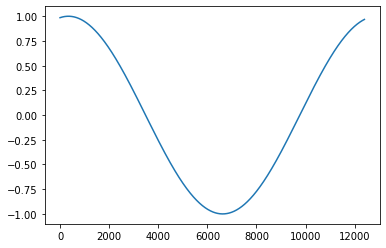

In [144]:
print(ps1)
print(ps2)
print(ps3)

#plt.plot(f1[0:123])
#plt.plot(f2[36:110])
#plt.plot(f3[63:190])
plt.plot(f4[2800:15200])


In [146]:

df1 = np.fft.rfft(f1[0:123])
df2 = np.fft.rfft(f2[36:110])
df3 = np.fft.rfft(f3[63:190])
df4 = np.fft.rfft(f4[2800:15200])

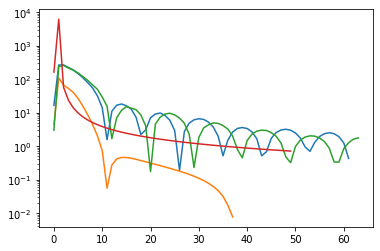

In [151]:
plt.plot(np.abs(df1))
plt.plot(np.abs(df2))
plt.plot(np.abs(df3))
plt.plot(np.abs(df4[0:50]))
plt.yscale("log")

0.037858905190919494
0.06651875256267374
0.03611561905277616
0.011851926573010558


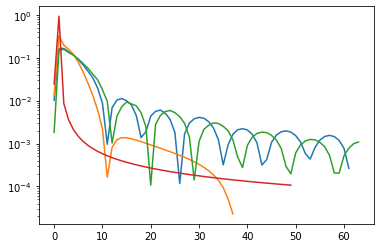

In [153]:
ff1 = np.abs(df1)/np.trapz(np.abs(df1))
ff2 = np.abs(df2)/np.trapz(np.abs(df2))
ff3 = np.abs(df3)/np.trapz(np.abs(df3))
ff4 = np.abs(df4)/np.trapz(np.abs(df4))



print(np.std(ff1))
print(np.std(ff2))
print(np.std(ff3))
print(np.std(ff4))

plt.plot(ff1)
plt.plot(ff2)
plt.plot(ff3)
plt.plot(ff4[0:50])

plt.yscale("log")